<a href="https://colab.research.google.com/github/m3t3orkoga/HomeworkCNN/blob/main/Vietnamese_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D ,Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_dir="/content/drive/MyDrive/money"

img_width, img_height = 128, 128
batch_size=32

train_datagen =ImageDataGenerator(
  rescale=1.0/255,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest"
)

In [15]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode="categorical"
)

model = Sequential([
  Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation="relu"),
  Dropout(0.5),
  Dense(9, activation="softmax")
])

Found 3771 images belonging to 9 classes.


In [16]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])
model.summary()

epochs = 20
history =model.fit(train_generator,epochs=epochs)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 117s 959ms/step - accuracy: 0.4338 - loss: 1.2656
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.8149 - loss: 0.4662
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.9227 - loss: 0.2368
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 346ms/step - accuracy: 0.9314 - loss: 0.2075
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.9473 - loss: 0.1691
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 349ms/step - accuracy: 0.9580 - loss: 0.1404
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - accuracy: 0.9508 - loss: 0.1384
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 345ms/step - accuracy: 0.9676 - loss: 0.1132
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/step - accuracy: 0.9724 - loss: 0.0865
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 339ms/step - accuracy: 0.9670 - loss: 0.0986
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 339ms/step - accuracy: 0.9665 - loss: 0.1073
Epoch 12/20
118/11

In [17]:
from keras.models import load_model
model.save('/content/drive/MyDrive/vietnamesebanknote.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


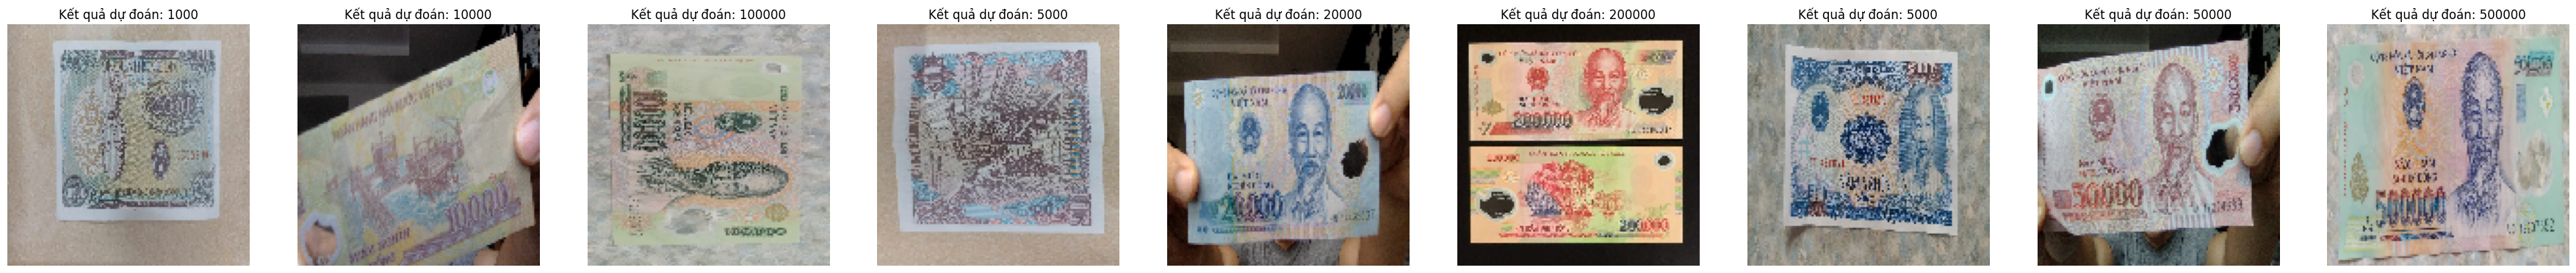

In [20]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/MyDrive/vietnamesebanknote.h5')

image_paths = [
    "/content/drive/MyDrive/money/1000/z6433966970624_18a19ec74456732beafb7110871be6c2.jpg",
    "/content/drive/MyDrive/money/10000/1004.png",
    "/content/drive/MyDrive/money/100000/z6433921003520_57e42313fd14bcb1a58e9cfb70b4fb10.jpg",
    "/content/drive/MyDrive/money/2000/z6433967703880_9f0705ada8495e320c3eea6870365ffc.jpg",
    "/content/drive/MyDrive/money/20000/1018.png",
    "/content/drive/MyDrive/money/200000/81-PIzr3XML._AC_SX679_.jpg",
    "/content/drive/MyDrive/money/5000/z6433921697367_cbe2d0737a318c7a5fa08180ac62ba37.jpg",
    "/content/drive/MyDrive/money/50000/1005.png",
    "/content/drive/MyDrive/money/500000/z6433919797210_c53a2fa4a106e3319aad90b8fe6d867e.jpg"

]

num_images = len(image_paths)

fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(128, 128))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 128, 128, 3)
    prediction = np.argmax(model.predict(img_array))

    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    person_name = class_labels[prediction]

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Kết quả dự đoán: {person_name}")

plt.show()